In [1]:
from pandas_datareader import data as pdr
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import json
yf.pdr_override() # <== that's all it takes :-)%%!

In [2]:
tickersFrame = pd.read_csv('HKTickersAttributes.csv')
tickersFrame=tickersFrame.dropna()
print(tickersFrame.shape)
tickersFrame=tickersFrame.astype({'trailingPE': 'float64'})
tickersFrame.set_index(['sector','symbol'], inplace=True)
tickersFrame.sort_index(inplace=True)
tickersFrame=tickersFrame.sort_values(by=['sector', 'trailingPE', 'priceToBook'], ascending=True).groupby('sector').head(1)
tickersFrame

(1014, 10)


,,industry,longName,volume,profitMargins,sharesOutstanding,regularMarketPreviousClose,trailingPE,priceToBook
sector,symbol,,,,,,,,
Basic Materials,2268.HK,Paper & Paper Products,Youyuan International Holdings Limited,121775000,0.16282,1.243030e+09,0.260,0.429231,0.529532
Communication Services,0745.HK,Advertising Agencies,China National Culture Group Limited,60000,-0.68323,9.814410e+09,0.013,0.838710,0.590909
Consumer Cyclical,8272.HK,Restaurants,Chinese Food and Beverage Group Limited,10000,4.73911,7.925400e+07,0.119,0.111007,0.915385
Consumer Defensive,6183.HK,Packaged Foods,"China Greenfresh Group Co., Ltd.",434000,0.12644,1.191380e+09,0.195,0.931627,0.705882
Energy,1733.HK,Thermal Coal,E-Commodities Holdings Limited,132000,0.02008,3.041200e+09,0.350,1.241259,0.333647
Financial Services,0263.HK,Capital Markets,GT Group Holdings Limited,114200,0.00000,1.401920e+08,0.200,0.289855,0.471698
Healthcare,3839.HK,Biotechnology,Chia Tai Enterprises International Limited,3504,0.15142,2.407180e+08,1.360,2.155505,1.766917
Industrials,3822.HK,Engineering & Construction,Sam Woo Construction Group Limited,200000,-0.08522,1.680000e+09,0.132,0.826629,0.349333
Real Estate,0115.HK,Real Estate—Development,Grand Field Group Holdings Limited,610000,2.74388,2.449550e+09,0.101,0.199290,0.202405


In [3]:
f=pd.DataFrame(columns=yf.Ticker('0115.HK').financials.transpose().columns)
f['symbol']=""
for t in tickersFrame.index:
    nf=yf.Ticker(t[1]).financials.transpose()
    nf['symbol']=t[1]
    f=f.append(nf)

In [4]:
f.index.names = ['Date']
f.set_index(['symbol']).groupby('symbol').head(1)
m=pd.merge(tickersFrame,f.set_index(['symbol']).groupby('symbol').head(1), on='symbol')
m

,industry,longName,volume,profitMargins,sharesOutstanding,regularMarketPreviousClose,trailingPE,priceToBook,Research Development,Effect Of Accounting Charges,...,Non Recurring,Other Items,Income Tax Expense,Total Revenue,Total Operating Expenses,Cost Of Revenue,Total Other Income Expense Net,Discontinued Operations,Net Income From Continuing Ops,Net Income Applicable To Common Shares
symbol,,,,,,,,,,,,,,,,,,,,,
2268.HK,Paper & Paper Products,Youyuan International Holdings Limited,121775000,0.16282,1.243030e+09,0.260,0.429231,0.529532,None,None,...,None,None,2.66049e+08,4.05984e+09,2.81247e+09,2.41908e+09,-2.55642e+08,None,7.25678e+08,6.61041e+08
0745.HK,Advertising Agencies,China National Culture Group Limited,60000,-0.68323,9.814410e+09,0.013,0.838710,0.590909,None,None,...,None,None,-9.443e+06,8.9876e+07,9.8803e+07,6.8805e+07,-6.642e+07,None,-6.5904e+07,-6.5904e+07
8272.HK,Restaurants,Chinese Food and Beverage Group Limited,10000,4.73911,7.925400e+07,0.119,0.111007,0.915385,None,None,...,None,None,0,2.3152e+07,3.562e+07,1.9364e+07,9.7511e+07,NaN,8.5043e+07,8.5041e+07
6183.HK,Packaged Foods,"China Greenfresh Group Co., Ltd.",434000,0.12644,1.191380e+09,0.195,0.931627,0.705882,None,None,...,None,None,5.18e+06,1.00705e+09,8.93901e+08,8.35143e+08,3.9278e+07,None,1.47243e+08,1.43699e+08
1733.HK,Thermal Coal,E-Commodities Holdings Limited,132000,0.02008,3.041200e+09,0.350,1.241259,0.333647,None,None,...,None,None,3.0687e+07,3.28175e+10,3.17821e+10,3.12024e+10,-1.1161e+08,NaN,8.93026e+08,8.79772e+08
0263.HK,Capital Markets,GT Group Holdings Limited,114200,0.00000,1.401920e+08,0.200,0.289855,0.471698,None,None,...,None,None,2.544e+06,-2.27509e+08,1.01859e+08,134000,-4.12796e+08,NaN,-7.44708e+08,-7.44708e+08
3839.HK,Biotechnology,Chia Tai Enterprises International Limited,3504,0.15142,2.407180e+08,1.360,2.155505,1.766917,None,None,...,None,None,1.61e+06,9.3362e+07,9.0377e+07,6.6108e+07,2.1829e+07,None,2.3204e+07,2.1164e+07
3822.HK,Engineering & Construction,Sam Woo Construction Group Limited,200000,-0.08522,1.680000e+09,0.132,0.826629,0.349333,None,None,...,None,None,-7.127e+06,4.52268e+08,5.09914e+08,4.47886e+08,149000,None,-5.037e+07,-5.037e+07
0115.HK,Real Estate—Development,Grand Field Group Holdings Limited,610000,2.74388,2.449550e+09,0.101,0.199290,0.202405,None,None,...,None,None,1.2392e+08,6.8019e+07,8.344e+07,1.4856e+07,4.92063e+08,None,3.52722e+08,1.93255e+08


In [15]:
import matplotlib.dates as mdates
def pltdata(data, label):
    hsi=yf.Ticker('^HSI')
    fig=plt.figure()
    fig.set_size_inches(18.5, 10.5)
    plt.plot(hsi.history(period='5y')['Close'], linestyle='-', linewidth=1, label='HSI')
    plt.plot(data['Close'], linestyle='--', linewidth=1, label=label)
    plt.legend()
    plt.show()

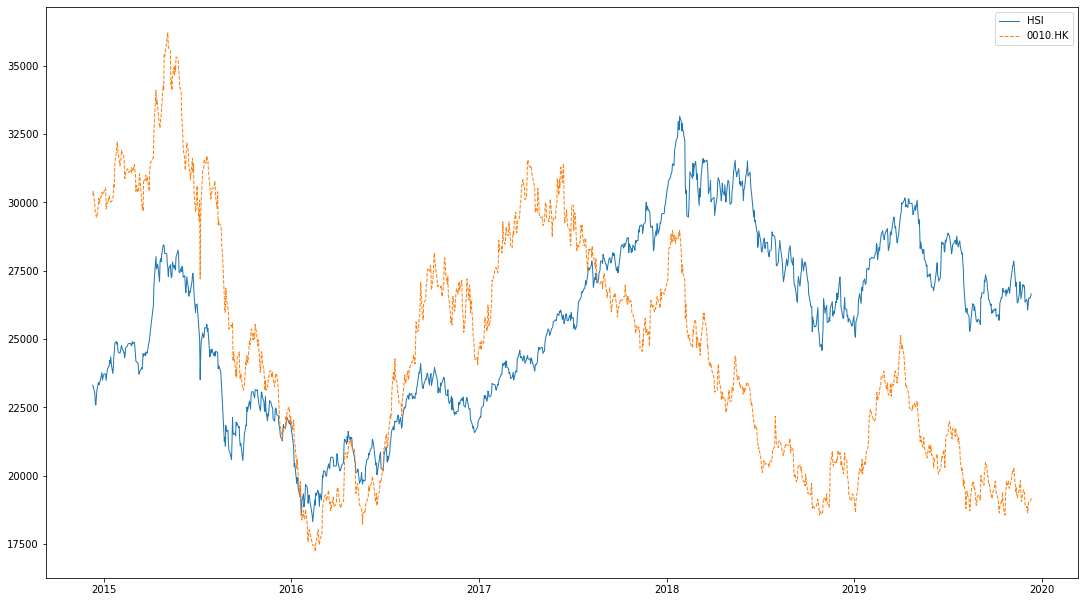

In [16]:
t=yf.Ticker('0010.HK')
data=(t.history(period='5y'))
data['Close']=data['Close']*1000
pltdata(data,t.info['symbol'])